## Unsupervised Learning Assignment

Ari Boyarsky

aboyarsky@uchicago.edu

*Due:* 12/4/17 11:30am

### Part 1: Colleges

**Question 1.** Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.


First, we import relevant libraries:

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [150]:
colleges = pd.read_csv("college.csv")
# Drop Numerics
colleges = colleges.select_dtypes(['number'])

In [151]:
# Scale variables
dta = pd.DataFrame(scale(colleges), columns = colleges.columns, index = None)
dta.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


Begin PCA:

In [152]:
pca = PCA().fit(dta)
vars(pca)

{'components_': array([[  2.48765602e-01,   2.07601502e-01,   1.76303592e-01,
           3.54273947e-01,   3.44001279e-01,   1.54640962e-01,
           2.64425045e-02,   2.94736419e-01,   2.49030449e-01,
           6.47575181e-02,  -4.25285386e-02,   3.18312875e-01,
           3.17056016e-01,  -1.76957895e-01,   2.05082369e-01,
           3.18908750e-01,   2.52315654e-01],
        [  3.31598227e-01,   3.72116750e-01,   4.03724252e-01,
          -8.24118211e-02,  -4.47786551e-02,   4.17673774e-01,
           3.15087830e-01,  -2.49643522e-01,  -1.37808883e-01,
           5.63418434e-02,   2.19929218e-01,   5.83113174e-02,
           4.64294477e-02,   2.46665277e-01,  -2.46595274e-01,
          -1.31689865e-01,  -1.69240532e-01],
        [ -6.30921033e-02,  -1.01249056e-01,  -8.29855709e-02,
           3.50555339e-02,  -2.41479376e-02,  -6.13929764e-02,
           1.39681716e-01,   4.65988731e-02,   1.48967389e-01,
           6.77411649e-01,   4.99721120e-01,  -1.27028371e-01,
          -

In [153]:
cols = ["PC"+str(x) for x in range (1,18)]
PCs = pd.DataFrame(pca.components_.T, index=dta.columns, columns = cols)
PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


We construct a biplot to analyze our principal components:

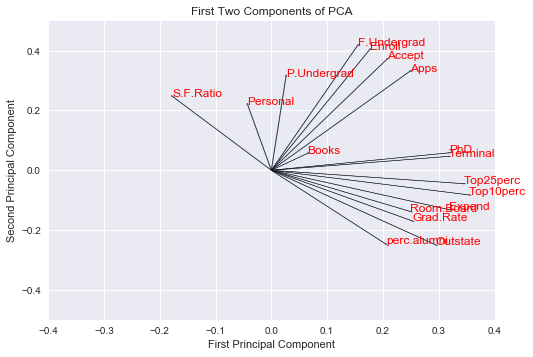

In [154]:
# Plot Labels
for i in PCs[["PC1", "PC2"]].index:
    plt.annotate(i, (PCs.PC1.loc[i], PCs.PC2.loc[i]), color='red')

# Plot vectors
for i in range(0,17):
    plt.arrow(0,0,PCs.PC1[i], PCs.PC2[i])


plt.xlim(-.4, .4)
plt.ylim(-.5, .5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("First Two Components of PCA")
plt.show()

The above plot shows us the column vectors for the first two components of the data. This shows how each column measures on our components. We sort this list below:

In [155]:
correlates_PC1 = {}
correlates_PC2 = {}
for i in range(0,17):
    correlates_PC1[dta.columns[i]] = PCs.PC1[i] 
    correlates_PC2[dta.columns[i]] = PCs.PC2[i] 

In [156]:
sorted(correlates_PC1.items(), key=lambda x:-x[1])

[('Top10perc', 0.35427394746990409),
 ('Top25perc', 0.34400127906826938),
 ('Expend', 0.31890875035625876),
 ('PhD', 0.31831287489467608),
 ('Terminal', 0.31705601617109119),
 ('Outstate', 0.29473641937557904),
 ('Grad.Rate', 0.2523156539365155),
 ('Room.Board', 0.24903044871531976),
 ('Apps', 0.2487656015081913),
 ('Accept', 0.20760150191693749),
 ('perc.alumni', 0.20508236899156201),
 ('Enroll', 0.17630359161422476),
 ('F.Undergrad', 0.15464096160059573),
 ('Books', 0.064757518145620294),
 ('P.Undergrad', 0.026442504480412712),
 ('Personal', -0.042528538599104861),
 ('S.F.Ratio', -0.17695789465779979)]

Thus, it appears Top10perc, Top25perc, Expend, PhD, and Terminal are most correlated with component 1, with scores above 0.3.

In [157]:
sorted(correlates_PC2.items(), key=lambda x:-x[1])

[('F.Undergrad', 0.41767377422521951),
 ('Enroll', 0.40372425211028495),
 ('Accept', 0.37211674985185117),
 ('Apps', 0.33159822736214295),
 ('P.Undergrad', 0.31508783004902563),
 ('S.F.Ratio', 0.24666527718103118),
 ('Personal', 0.21992921768782528),
 ('PhD', 0.058311317409711065),
 ('Books', 0.056341843387770631),
 ('Terminal', 0.046429447662746037),
 ('Top25perc', -0.04477865510405199),
 ('Top10perc', -0.082411821130183749),
 ('Expend', -0.13168986492751927),
 ('Room.Board', -0.13780888262731755),
 ('Grad.Rate', -0.16924053207822246),
 ('perc.alumni', -0.24659527396125169),
 ('Outstate', -0.24964352163538225)]

It appears F.Undergrad, Enroll, Accept, Apps, and P.Undegrad are most correlated with component 2 with scores over 0.3.

**Question 2:** Calculate the cumulative proportion of variance explained by all the principal components (see 10.2.3 in ISLR). 

In [158]:
pca.explained_variance_ratio_

array([ 0.32020628,  0.26340214,  0.06900917,  0.05922989,  0.05488405,
        0.04984701,  0.03558871,  0.03453621,  0.03117234,  0.02375192,
        0.01841426,  0.01296041,  0.00985754,  0.00845842,  0.00517126,
        0.00215754,  0.00135284])

In [159]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.32020628,  0.58360843,  0.65261759,  0.71184748,  0.76673154,
        0.81657854,  0.85216726,  0.88670347,  0.91787581,  0.94162773,
        0.96004199,  0.9730024 ,  0.98285994,  0.99131837,  0.99648962,
        0.99864716,  1.        ])

The first array above shows proportion of variancre explained by each variable. The second array shows the cumulative variance explained when you add in the previous components. Notice that it is decreasing as 

*Approximately how much of the variance in College is explained by the first two principal components?*

Thus, the first two components explain **58.36%** of the variance.

Following, ISLR we also plot the cummulative variance so we can see the marginal effect of each component. Notice we have diminishing marginal returns (to total variance explained).

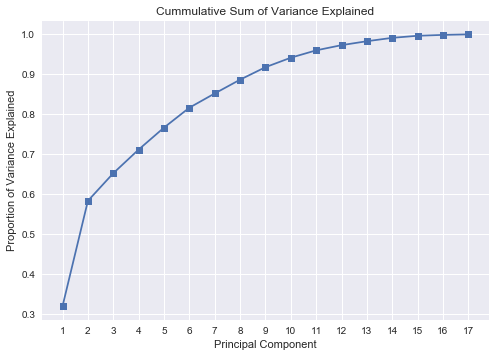

In [160]:
plt.plot(list(range(1,18)), np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.title("Cummulative Sum of Variance Explained")
plt.xticks(list(range(1,18)))
plt.show()

### Part 2: Clustering States

1. Perform PCA on the dataset and plot the observations on the first and second principal components.


In [101]:
states = pd.read_csv("USArrests.csv", index_col=0)
states.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [102]:
states_scaled = pd.DataFrame(scale(states), index=states.index, columns = states.columns)
states_scaled.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [103]:
pca = PCA().fit(states_scaled)
vars(pca)

{'components_': array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
        [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
        [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
        [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]]),
 'copy': True,
 'explained_variance_': array([ 2.48024158,  0.98976515,  0.35656318,  0.17343009]),
 'explained_variance_ratio_': array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752]),
 'iterated_power': 'auto',
 'mean_': array([ -7.10542736e-17,   1.38777878e-16,  -4.39648318e-16,
          8.59312621e-16]),
 'n_components': None,
 'n_components_': 4,
 'n_features_': 4,
 'n_samples_': 50,
 'noise_variance_': 0.0,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [104]:
PCs = pd.DataFrame(pca.components_.T, index=states_scaled.columns, columns=["PC1", "PC2", "PC3", "PC4"])
state_plot = pd.DataFrame(pca.fit_transform(states_scaled), columns=["PC1", "PC2", "PC3", "PC4"], index = states.index)

In [105]:
PCs.head()
state_plot.head()

,PC1,PC2,PC3,PC4
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


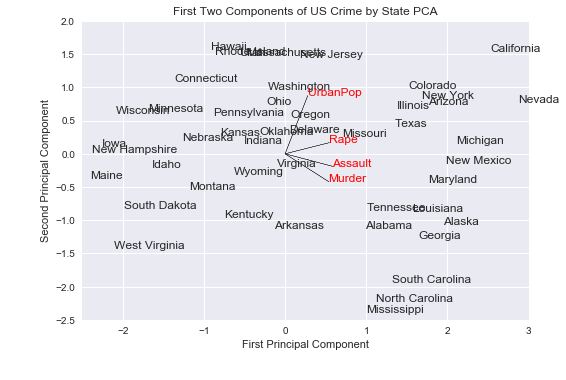

In [106]:
# Plot States
for i in state_plot.index:
    plt.annotate(i, (state_plot.PC1.loc[i], -state_plot.PC2.loc[i]))
# Plot vectors
for i in range(0,4):
    plt.arrow(0,0,PCs.PC1[i], -PCs.PC2[i])
for i in PCs[["PC1", "PC2"]].index:
    plt.annotate(i, (PCs.PC1.loc[i], -PCs.PC2.loc[i]), color='red')
plt.xlim(-2.5, 3)
plt.ylim(-2.5, 2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("First Two Components of US Crime by State PCA")
plt.show()

Question 2.Perform $K$-means clustering with $K=2$.  

In [107]:
k2 = KMeans(n_clusters=2, n_init=20).fit(states_scaled)
k2.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [108]:
k2.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

In [109]:
k2.inertia_
pca.fit_transform(k2.cluster_centers_)[:,0]

array([ 1.40711264, -1.40711264])

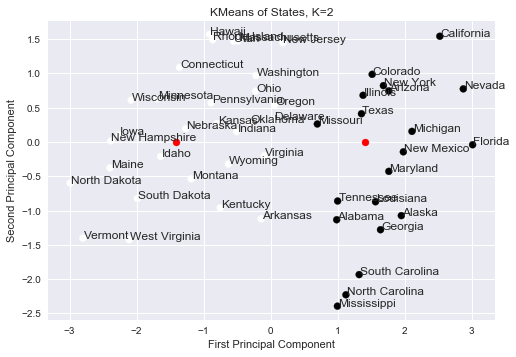

In [110]:
plt.scatter(pca.fit_transform(k2.cluster_centers_)[:,0], pca.fit_transform(k2.cluster_centers_)[:,1], c='r')
plt.scatter(state_plot.PC1, -state_plot.PC2, c=k2.labels_)
for i in state_plot.index:
    plt.annotate(i, (state_plot.PC1.loc[i]+.01, -state_plot.PC2.loc[i]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of States, K=2")
plt.show()

We see that the k-means has seperated our data into 2 groups. Plotting the state names on the points there is no obvious simmilarity beyond the data that emerges.

Question 3. Perform $K$-means clustering with $K=3$

In [111]:
k3 = KMeans(n_clusters=3, n_init=20).fit(states_scaled)

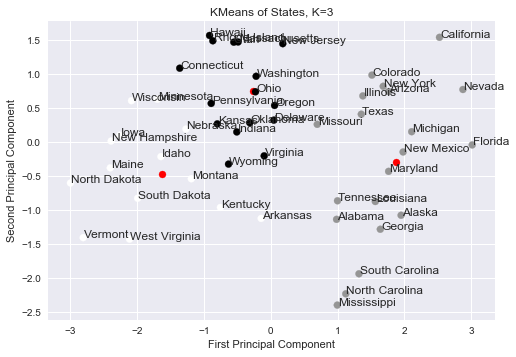

In [112]:
plt.scatter(pca.fit_transform(k3.cluster_centers_)[:,0], pca.fit_transform(k3.cluster_centers_)[:,1], c='r')
plt.scatter(state_plot.PC1, -state_plot.PC2, c=k3.labels_)
for i in state_plot.index:
    plt.annotate(i, (state_plot.PC1.loc[i]+.01, -state_plot.PC2.loc[i]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of States, K=3")
plt.show()

Here we see the states seperated into three groups. Notice that it seemes that the first group (white in the k=2 graph) has been split into two.

Question 4. Perform $K$-means clustering with $K=4$

In [113]:
k4 = KMeans(n_clusters=4, n_init=20).fit(states_scaled)

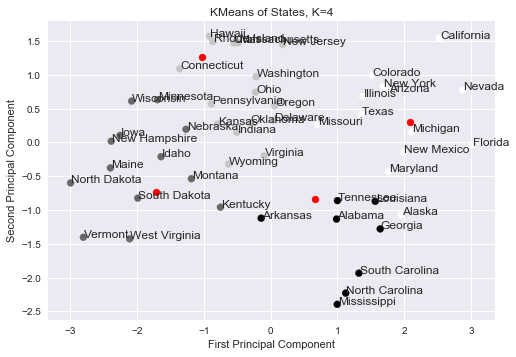

In [114]:
plt.scatter(pca.fit_transform(k4.cluster_centers_)[:,0], pca.fit_transform(k4.cluster_centers_)[:,1], c='r')
plt.scatter(state_plot.PC1, -state_plot.PC2, c=k4.labels_)
for i in state_plot.index:
    plt.annotate(i, (state_plot.PC1.loc[i]+.01, -state_plot.PC2.loc[i]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of States, K=4")
plt.show()

Now it seems that both our initial groups have been split into 2 such that we have 4 groups emerge. There is some geographic simmilarity among the states, SC and NC are in the same group etc. This is by no means rigorously true however.

Question 5. Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.


In [115]:
k3_scores = KMeans(n_clusters=3, n_init=20).fit(state_plot)

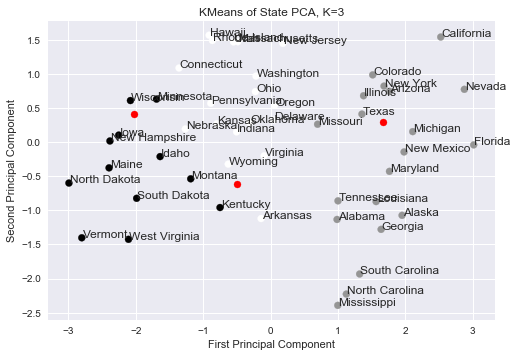

In [116]:
plt.scatter(state_plot.PC1, -state_plot.PC2, c=k3_scores.labels_)
plt.scatter(k3_scores.cluster_centers_[:,0], k3_scores.cluster_centers_[:,1], c='r')
for i in state_plot.index:
    plt.annotate(i, (state_plot.PC1.loc[i]+.01, -state_plot.PC2.loc[i]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of State PCA, K=3")
plt.show()

Compared to the inital k=3 clustering these results are similar though the groups seem to be centered at different locations. However the state data and groups appear to be mostly the same.

Question 6. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

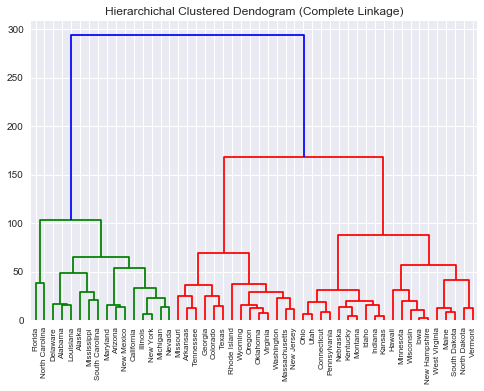

In [117]:
hc = hierarchy.complete(states)
hierarchy.dendrogram(hc, labels = states.index)
plt.title("Hierarchichal Clustered Dendogram (Complete Linkage)")
plt.show()

Question 7. Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?


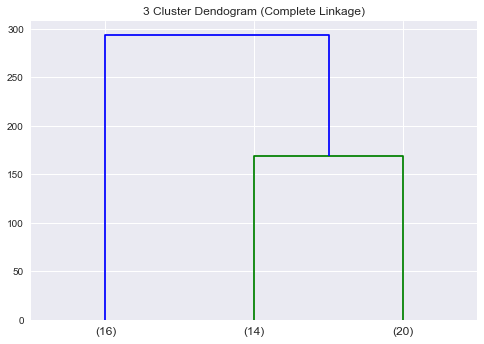

In [118]:
hc = hierarchy.complete(states)
hierarchy.dendrogram(hc, truncate_mode='lastp', p=3, labels = states.index)
plt.title("3 Cluster Dendogram (Complete Linkage)")
plt.show()

In [119]:
ctree = hierarchy.cut_tree(hc, n_clusters=3)
membership = pd.DataFrame(ctree, states.index)
membership.columns = ["Group"]
membership.sort_values(by="Group")

,Group
State,
Alabama,0
Michigan,0
Maryland,0
New Mexico,0
Louisiana,0
New York,0
North Carolina,0
Illinois,0
Nevada,0


The above list prints each state and it's associated group membership in a 3-cluster cut tree.

Question 8. Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?


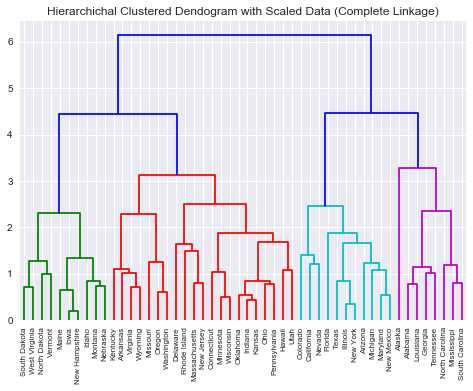

In [128]:
hc = hierarchy.complete(states_scaled)
hierarchy.dendrogram(hc, labels = states.index)
plt.title("Hierarchichal Clustered Dendogram with Scaled Data (Complete Linkage)")
plt.show()

To better evaluate the changes from the scaled and non-scaled dendogram we plot them next to each other:

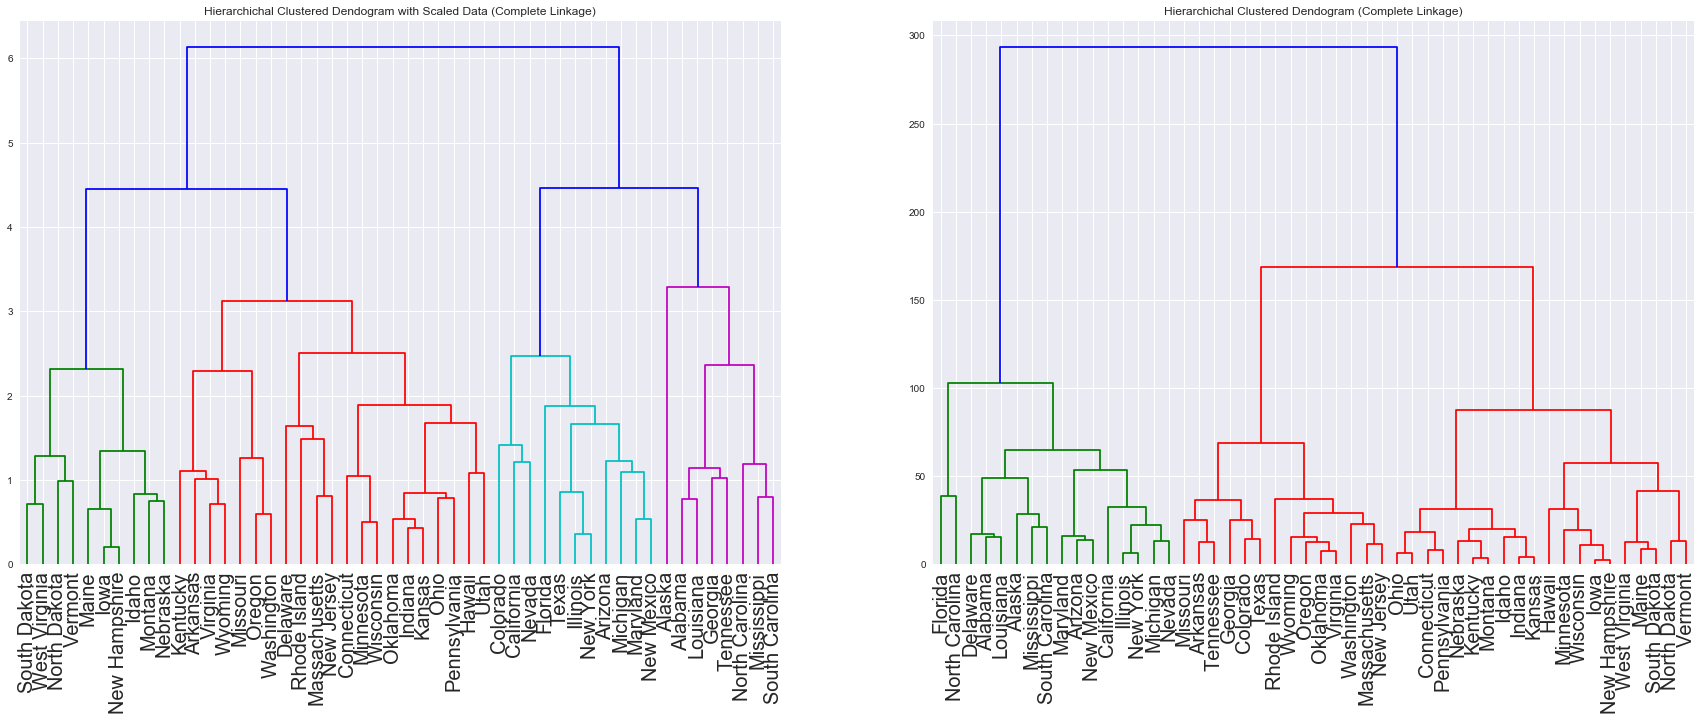

In [148]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(30, 10))
hc = hierarchy.complete(states_scaled)
hierarchy.dendrogram(hc, labels = states.index, ax = ax1, leaf_font_size=20)
ax1.set_title("Hierarchichal Clustered Dendogram with Scaled Data (Complete Linkage)")

hc = hierarchy.complete(states)
hierarchy.dendrogram(hc, labels = states.index, ax = ax2, leaf_font_size=20)
ax2.set_title("Hierarchichal Clustered Dendogram (Complete Linkage)")
plt.show()

It seems that the scaled dendogram breaks into groups much faster than the non-scaled graph. That is, there seems to be less distance between cases in the scaled dendogram. This makes quite a bit of sense since we are clustering on various variables that do not share the same scale. So by scaling them they each carry equal weight. This is quite useful because we such great disparities between for instance, assualt and murder.  